<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%209/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-20 19:51:40.342801


In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/s8'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch

In [0]:
import data_loading

In [0]:
import show_images

In [0]:
import dnn_architecture

In [0]:
import QuizDNN

In [0]:
import train_and_test

In [0]:
import evaluate

In [11]:
classes, trainloader, testloader = data_loading.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat


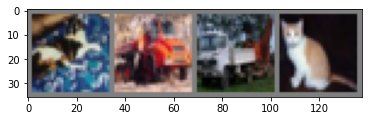

In [12]:
show_images.show_random_images(trainloader, classes)

In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = QuizDNN.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR,MultiStepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = MultiStepLR(optimizer, milestones=[10,13,15], gamma=0.1)

In [15]:

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    train_and_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.0293991565704346 Batch_id=390 Accuracy=52.97: 100%|██████████| 391/391 [00:13<00:00, 29.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 5955/10000 (59.55%)

EPOCH: 2 LR: 0.1


Loss=0.703702986240387 Batch_id=390 Accuracy=69.57: 100%|██████████| 391/391 [00:13<00:00, 28.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6877/10000 (68.77%)

EPOCH: 3 LR: 0.1


Loss=0.5123711824417114 Batch_id=390 Accuracy=75.94: 100%|██████████| 391/391 [00:13<00:00, 29.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7574/10000 (75.74%)

EPOCH: 4 LR: 0.1


Loss=0.7384642362594604 Batch_id=390 Accuracy=79.63: 100%|██████████| 391/391 [00:13<00:00, 29.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7528/10000 (75.28%)

EPOCH: 5 LR: 0.1


Loss=0.6302106380462646 Batch_id=390 Accuracy=81.61: 100%|██████████| 391/391 [00:13<00:00, 28.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7562/10000 (75.62%)

EPOCH: 6 LR: 0.1


Loss=0.5063633918762207 Batch_id=390 Accuracy=82.93: 100%|██████████| 391/391 [00:13<00:00, 28.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7494/10000 (74.94%)

EPOCH: 7 LR: 0.1


Loss=0.4897696077823639 Batch_id=390 Accuracy=83.85: 100%|██████████| 391/391 [00:13<00:00, 29.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7818/10000 (78.18%)

EPOCH: 8 LR: 0.1


Loss=0.4976674020290375 Batch_id=390 Accuracy=84.11: 100%|██████████| 391/391 [00:13<00:00, 29.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7843/10000 (78.43%)

EPOCH: 9 LR: 0.1


Loss=0.4075865149497986 Batch_id=390 Accuracy=84.75: 100%|██████████| 391/391 [00:13<00:00, 29.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7925/10000 (79.25%)

EPOCH: 10 LR: 0.1


Loss=0.4408736824989319 Batch_id=390 Accuracy=85.35: 100%|██████████| 391/391 [00:13<00:00, 29.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7954/10000 (79.54%)

EPOCH: 11 LR: 0.010000000000000002


Loss=0.23967023193836212 Batch_id=390 Accuracy=91.13: 100%|██████████| 391/391 [00:13<00:00, 29.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8620/10000 (86.20%)

EPOCH: 12 LR: 0.010000000000000002


Loss=0.278948038816452 Batch_id=390 Accuracy=93.34: 100%|██████████| 391/391 [00:13<00:00, 28.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8653/10000 (86.53%)

EPOCH: 13 LR: 0.010000000000000002


Loss=0.1859750896692276 Batch_id=390 Accuracy=94.26: 100%|██████████| 391/391 [00:14<00:00, 27.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8684/10000 (86.84%)

EPOCH: 14 LR: 0.0010000000000000002


Loss=0.15928694605827332 Batch_id=390 Accuracy=95.35: 100%|██████████| 391/391 [00:13<00:00, 28.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8685/10000 (86.85%)

EPOCH: 15 LR: 0.0010000000000000002


Loss=0.20614400506019592 Batch_id=390 Accuracy=95.48: 100%|██████████| 391/391 [00:13<00:00, 28.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8671/10000 (86.71%)

EPOCH: 16 LR: 0.00010000000000000003


Loss=0.17077097296714783 Batch_id=390 Accuracy=95.76: 100%|██████████| 391/391 [00:13<00:00, 28.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8695/10000 (86.95%)

EPOCH: 17 LR: 0.00010000000000000003


Loss=0.19651058316230774 Batch_id=390 Accuracy=95.78: 100%|██████████| 391/391 [00:13<00:00, 28.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8698/10000 (86.98%)

EPOCH: 18 LR: 0.00010000000000000003


Loss=0.06907390058040619 Batch_id=390 Accuracy=95.75: 100%|██████████| 391/391 [00:14<00:00, 27.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8692/10000 (86.92%)

EPOCH: 19 LR: 0.00010000000000000003


Loss=0.19955411553382874 Batch_id=390 Accuracy=95.81: 100%|██████████| 391/391 [00:13<00:00, 28.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8702/10000 (87.02%)

EPOCH: 20 LR: 0.00010000000000000003


Loss=0.17536644637584686 Batch_id=390 Accuracy=95.88: 100%|██████████| 391/391 [00:14<00:00, 27.73it/s]



Test set: Average loss: 0.0032, Accuracy: 8690/10000 (86.90%)



Text(0.5, 1.0, 'Test Accuracy')

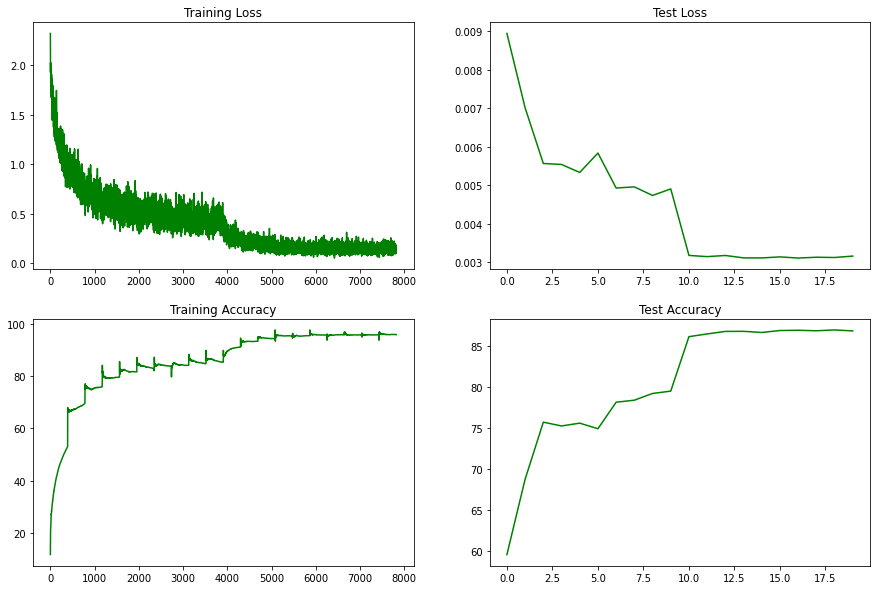

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_and_test.train_losses,color = 'g')
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_and_test.train_acc,color = 'g')
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_and_test.test_losses,color = 'g')
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_and_test.test_acc,color = 'g')
axs[1, 1].set_title("Test Accuracy")

GroundTruth:    dog plane  bird truck horse
Predicted:   bird plane  bird truck horse


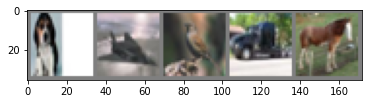

In [17]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [18]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 86 %


In [19]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 80 %
Accuracy of   car : 97 %
Accuracy of  bird : 74 %
Accuracy of   cat : 71 %
Accuracy of  deer : 90 %
Accuracy of   dog : 61 %
Accuracy of  frog : 88 %
Accuracy of horse : 97 %
Accuracy of  ship : 89 %
Accuracy of truck : 89 %
